In [114]:
from database.market import Market
from database.sec import SEC
from database.adatabase import ADatabase
from processor.processor import Processor as p
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
from statistics import stdev

In [2]:
market = Market()
sec = SEC()

In [3]:
market.connect()
sp5 = market.retrieve("sp500")
market.disconnect()

In [152]:
keywords = ['earnings',"debt","liabilities","assets","stockholder","equity","income","revenue","depreciation","expenditure","taxrate","ebit","cash"]

In [153]:
filings = []
sec.connect()
market.connect()
column_database = {}
for i in tqdm(range(sp5.index.size)):
    try:
        row = sp5.iloc[i]
        ticker = row["Symbol"]
        cik = int(row["CIK"])
        prices = market.retrieve_ticker_prices("prices",ticker)
        prices = p.column_date_processing(prices)
        price_variance = stdev(prices["adjclose"])
        prices = prices.groupby(["year","ticker"]).mean().reset_index()
        prices["variance"] = price_variance
        financials = sec.retrieve_filing_data(int(cik))
        financials = p.column_date_processing(financials)
        financials["date"] = [datetime.strptime(str(x),"%Y%m%d") for x in financials["filed"]]
        financials["year"] = [x.year for x in financials["date"]]
        financials["quarter"] = [x.quarter for x in financials["date"]]
        financials = financials[financials["form"]=="10-K"]
        included = ["year","quarter","date"]
        for keyword in keywords:
            included.extend([x for x in financials.columns if keyword in x])
        included = list(set(included))
        included.sort()
        for col in included:
            if col in column_database.keys():
                column_database[col] = column_database[col] + 1
            else:
                column_database[col] = 1
        cleaned = financials[included].reset_index(drop=True).fillna(method="ffill").fillna(method="bfill")
        cleaned = cleaned.groupby(["year"]).mean().reset_index()
        cleaned["ticker"] = ticker
        cleaned["industry"] = row["GICS Sector"]
        cleaned = cleaned.merge(prices[["year","ticker","adjclose","variance"]],on=["year","ticker"])
        filings.extend(cleaned.to_dict("records"))
    except Exception as e:
        print(ticker,str(e))
        continue
sec.disconnect()
market.disconnect()

  1%|▉                                                                                                                                                                | 3/495 [00:01<02:59,  2.74it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  1%|█▋                                                                                                                                                               | 5/495 [00:01<02:25,  3.36it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  1%|█▉                                                                                                                                                               | 6/495 [00:01<02:23,  3.41it/s]C:\Users\eric\AppData\Local\Te

  6%|█████████                                                                                                                                                       | 28/495 [00:10<02:52,  2.71it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  6%|█████████▎                                                                                                                                                      | 29/495 [00:11<03:01,  2.57it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
  6%|█████████▋                                                                                                                                                      | 30/495 [00:11<03:33,  2.17it/s]C:\Users\eric\AppData\Local\Te

 11%|█████████████████▍                                                                                                                                              | 54/495 [00:21<02:57,  2.49it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 11%|█████████████████▊                                                                                                                                              | 55/495 [00:22<02:45,  2.65it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 12%|██████████████████▍                                                                                                                                             | 57/495 [00:22<02:29,  2.93it/s]C:\Users\eric\AppData\Local\Te

 17%|██████████████████████████▌                                                                                                                                     | 82/495 [00:33<02:31,  2.73it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 17%|██████████████████████████▊                                                                                                                                     | 83/495 [00:34<02:33,  2.69it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 17%|███████████████████████████▏                                                                                                                                    | 84/495 [00:35<04:02,  1.70it/s]C:\Users\eric\AppData\Local\Te

 22%|███████████████████████████████████▋                                                                                                                           | 111/495 [00:45<03:08,  2.04it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 23%|███████████████████████████████████▉                                                                                                                           | 112/495 [00:46<02:53,  2.21it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 23%|████████████████████████████████████▉                                                                                                                          | 115/495 [00:47<02:33,  2.48it/s]C:\Users\eric\AppData\Local\Te

 28%|█████████████████████████████████████████████▎                                                                                                                 | 141/495 [00:57<02:13,  2.65it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 29%|█████████████████████████████████████████████▉                                                                                                                 | 143/495 [00:58<02:37,  2.24it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 29%|██████████████████████████████████████████████▎                                                                                                                | 144/495 [00:58<02:22,  2.46it/s]C:\Users\eric\AppData\Local\Te

DRE 'adjclose'


C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 32%|███████████████████████████████████████████████████                                                                                                            | 159/495 [01:05<02:27,  2.28it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 33%|███████████████████████████████████████████████████▋                                                                                                           | 161/495 [01:05<02:11,  2.53it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 33%|███████████████████████████████████

 37%|███████████████████████████████████████████████████████████▍                                                                                                   | 185/495 [01:16<02:45,  1.88it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 38%|███████████████████████████████████████████████████████████▋                                                                                                   | 186/495 [01:17<02:34,  2.00it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 38%|█████████████████████████████████████████████████████████████                                                                                                  | 190/495 [01:18<01:38,  3.08it/s]C:\Users\eric\AppData\Local\Te

FRC 'filed'


C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 39%|██████████████████████████████████████████████████████████████▋                                                                                                | 195/495 [01:20<02:01,  2.47it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 40%|██████████████████████████████████████████████████████████████▉                                                                                                | 196/495 [01:20<01:57,  2.55it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 40%|███████████████████████████████████

FBHS 'adjclose'


 41%|█████████████████████████████████████████████████████████████████▊                                                                                             | 205/495 [01:23<01:12,  4.00it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 42%|██████████████████████████████████████████████████████████████████▏                                                                                            | 206/495 [01:24<01:48,  2.66it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 42%|██████████████████████████████████████████████████████████████████▍                                                                                            | 207/495 [01:24<01:43,  2.79it/s]C:\Users\eric\AppData\Local\Te

 46%|█████████████████████████████████████████████████████████████████████████▏                                                                                     | 228/495 [01:34<01:49,  2.44it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 46%|█████████████████████████████████████████████████████████████████████████▌                                                                                     | 229/495 [01:35<02:21,  1.87it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 46%|█████████████████████████████████████████████████████████████████████████▉                                                                                     | 230/495 [01:35<01:58,  2.23it/s]C:\Users\eric\AppData\Local\Te

 52%|██████████████████████████████████████████████████████████████████████████████████▊                                                                            | 258/495 [01:46<01:11,  3.33it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 53%|███████████████████████████████████████████████████████████████████████████████████▌                                                                           | 260/495 [01:47<01:16,  3.06it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 53%|███████████████████████████████████████████████████████████████████████████████████▊                                                                           | 261/495 [01:47<01:37,  2.40it/s]C:\Users\eric\AppData\Local\Te

 58%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 286/495 [01:59<01:31,  2.30it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 58%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 287/495 [01:59<01:28,  2.36it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 58%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 289/495 [02:00<01:46,  1.94it/s]C:\Users\eric\AppData\Local\Te

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 311/495 [02:09<01:09,  2.66it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 312/495 [02:09<00:57,  3.21it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 313/495 [02:10<00:57,  3.14it/s]C:\Users\eric\AppData\Local\Te

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 345/495 [02:23<00:52,  2.85it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 347/495 [02:24<00:46,  3.19it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 348/495 [02:24<00:45,  3.26it/s]C:\Users\eric\AppData\Local\Te

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 376/495 [02:35<01:00,  1.96it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 381/495 [02:38<00:45,  2.49it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 383/495 [02:38<00:38,  2.91it/s]C:\Users\eric\AppData\Local\Te

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 408/495 [02:49<01:01,  1.42it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 409/495 [02:49<00:49,  1.72it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 413/495 [02:51<00:31,  2.60it/s]C:\Users\eric\AppData\Local\Te

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 436/495 [03:00<00:23,  2.55it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 437/495 [03:01<00:22,  2.55it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 438/495 [03:01<00:21,  2.63it/s]C:\Users\eric\AppData\Local\Te

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 468/495 [03:12<00:09,  2.88it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 472/495 [03:14<00:08,  2.76it/s]C:\Users\eric\AppData\Local\Temp/ipykernel_13300/850237405.py:36: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  filings.extend(cleaned.to_dict("records"))
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 473/495 [03:14<00:07,  2.93it/s]C:\Users\eric\AppData\Local\Te

In [154]:
financials = pd.DataFrame(filings)

In [155]:
col_db = pd.DataFrame([column_database]).melt()

In [161]:
col_db[col_db["variable"].str.contains("expenditure")].sort_values("value",ascending=False).head(10)

,variable,value
902,capitalexpendituresincurredbutnotyetpaid,176
3996,constructioninprogressexpendituresincurredbutn...,19
7262,capitalexpenditures,16
10788,accruedcapitalexpenditures,9
4564,changeincapitalexpendituresincurredbutnotyetpaid,8
4662,capitalexpenditurediscontinuedoperations,7
14875,segmentreportinginformationcapitalexpenditures,5
4598,increasedecreaseincapitalexpendituresincurredb...,4
27133,segmentreportinginformationexpendituresforaddi...,3
888,accruedcapitalexpenditurescurrent,3


In [128]:
financials["price_to_earnings"] = financials["adjclose"] / financials["earningspersharebasic"]
financials["current_ratio"] = financials["assetscurrent"] / financials["liabilitiescurrent"]
financials["debt_to_equity"] = financials["longtermdebt"] / financials["stockholdersequity"]
financials["debt_to_assets"] = financials["longtermdebt"] / financials["assets"]
financials["net_profit_margin"] = financials["netincomeloss"] / financials["revenues"]
financials["working_capital"] = (financials["assetscurrent"] - financials["liabilitiescurrent"]) / 1000000

In [129]:
analysis = financials[["year","ticker","current_ratio","price_to_earnings","debt_to_equity","debt_to_assets","net_profit_margin","working_capital","variance","adjclose"]]
analysis = analysis.merge(sp5.rename(columns={"Symbol":"ticker"})[["ticker","Security","GICS Sector"]],on="ticker",how="left")

In [130]:
analysis["GICS Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [131]:
year = 2023
industry = "Communication Services"

In [132]:
analysis[(analysis["year"]==year) & (analysis["price_to_earnings"]>0) & (analysis["GICS Sector"]==industry)].sort_values("price_to_earnings",ascending=True).head(50)

,year,ticker,current_ratio,price_to_earnings,debt_to_equity,debt_to_assets,net_profit_margin,working_capital,variance,adjclose,Security,GICS Sector
3928,2023,PARA,1.471214,5.148802,0.820239,0.318512,0.445665,4870.000,15.371481,21.556316,Paramount Global,Communication Services
1658,2023,DISH,0.967557,6.133070,NaN,NaN,NaN,-203.421,15.545872,11.808947,Dish Network,Communication Services
5166,2023,VZ,0.766303,8.037266,NaN,0.193804,0.153288,-11373.000,13.464162,39.329024,Verizon,Communication Services
1135,2023,CHTR,0.309220,15.254349,8.164530,0.659076,0.084076,-8470.000,200.128625,368.595921,Charter Communications,Communication Services
3864,2023,OMC,0.975814,15.491544,1.720804,0.202503,0.087898,-378.250,18.982328,89.592763,Omnicom Group,Communication Services
3367,2023,META,2.620689,16.319580,NaN,NaN,1.063756,39027.000,86.071304,178.645000,Meta Platforms,Communication Services
1337,2023,CMCSA,0.814764,17.174934,NaN,NaN,0.088064,-5301.000,14.133471,37.842105,Comcast,Communication Services
2746,2023,IPG,1.032760,19.002507,0.524234,0.097042,0.074163,341.900,8.528749,36.231447,The Interpublic Group of Companies,Communication Services
272,2023,GOOGL,2.642661,22.146287,0.065733,0.042267,0.292804,109692.000,35.522233,97.738947,Alphabet Inc. (Class A),Communication Services
79,2023,ATVI,4.529836,28.723605,0.223208,0.137665,0.736344,10529.500,27.661172,79.085658,Activision Blizzard,Communication Services


In [133]:
analysis.corr()

,year,current_ratio,price_to_earnings,debt_to_equity,debt_to_assets,net_profit_margin,working_capital,variance,adjclose
year,1.000000,-0.085664,0.008167,-0.009370,-0.000992,0.076512,0.011030,-0.007513,0.220136
current_ratio,-0.085664,1.000000,0.010170,-0.012807,-0.006415,0.008052,0.211169,0.092474,0.024722
price_to_earnings,0.008167,0.010170,1.000000,-0.000460,0.000349,0.012693,0.002467,0.004267,0.007209
debt_to_equity,-0.009370,-0.012807,-0.000460,1.000000,-0.814467,-0.006289,-0.003804,0.010040,0.002112
debt_to_assets,-0.000992,-0.006415,0.000349,-0.814467,1.000000,-0.045513,-0.001792,0.002129,0.002666
net_profit_margin,0.076512,0.008052,0.012693,-0.006289,-0.045513,1.000000,0.062704,-0.015799,0.020158
working_capital,0.011030,0.211169,0.002467,-0.003804,-0.001792,0.062704,1.000000,-0.008125,0.006551
variance,-0.007513,0.092474,0.004267,0.010040,0.002129,-0.015799,-0.008125,1.000000,0.823432
adjclose,0.220136,0.024722,0.007209,0.002112,0.002666,0.020158,0.006551,0.823432,1.000000


In [34]:
# start_date = datetime(2020,1,1)
# window = financials[financials["date"]>= start_date]
# plt.plot(window["date"],window["price_to_earnings"])

In [30]:
spy = pd.read_csv("./csv_files/FED/SPY.csv")

In [31]:
spy = p.column_date_processing(spy)

In [139]:
spy["year"] = [x.year for x in spy["date"]]
spy["quarter"] = [x.quarter for x in spy["date"]]
spy_quarterly = spy.groupby(["year","quarter"]).mean().reset_index()
spy_quarterly = spy_quarterly.rename(columns={"adjclose":"spy"})

In [140]:
cpi = pd.read_csv("./csv_files/FED/CPIAUCSL.csv")
cpi = p.column_date_processing(cpi)
cpi["year"] = [x.year for x in cpi["date"]]
cpi["quarter"] = [x.quarter for x in cpi["date"]]
cpi_quarterly = cpi.groupby(["year","quarter"]).mean().reset_index()
cpi_quarterly.rename(columns={"cpiaucsl":"cpi"},inplace=True)
cpi_quarterly["inflation"] = cpi_quarterly["cpi"].pct_change()
cpi_quarterly

,year,quarter,cpi,week,inflation
0,1947,1,21.700000,5.0,NaN
1,1947,2,22.010000,18.0,0.014286
2,1947,3,22.490000,31.333333,0.021808
3,1947,4,23.126667,44.333333,0.028309
4,1948,1,23.616667,5.333333,0.021188
...,...,...,...,...,...
299,2021,4,278.413333,43.666667,0.019219
300,2022,1,284.607667,22.0,0.022249
301,2022,2,291.821667,17.333333,0.025347
302,2022,3,295.884000,30.666667,0.013921


In [158]:
ticker = "AAPL"
financials_example = financials[financials["ticker"]==ticker].copy()

In [159]:
graphics = financials_example.merge(cpi_quarterly,on=["year","quarter"],how="left") \
                            .merge(spy_quarterly,on=["year","quarter"],how="left").copy()
graphics["date"] = [datetime(int(row[1]["year"]),int((row[1]["quarter"] - 1) * 3 + 1),1) for row in graphics.iterrows()]
graphics = graphics[(graphics["date"]>datetime(2013,1,1))].copy()
graphics.sort_values("date",inplace=True)

cpi_prog = [0]
for i in range(1,graphics.index.size):
    prev = cpi_prog[i-1]
    cpi_prog.append((1+prev) * (1 +  graphics["inflation"].iloc[i]) -1)
    
graphics["inflation_prog"] = cpi_prog
for vals in ["assets","liabilities","stockholdersequity","spy","debt_to_equity","adjclose"]:
    graphics[f"{vals}_adj"] = [row[1][vals] * (1-row[1]["inflation_prog"]) for row in graphics.iterrows()]
    
    
graphics["adjclose_prog"] = (graphics["adjclose"] - graphics["adjclose"].iloc[0]) / graphics["adjclose"].iloc[0]
graphics["adjclose_delt"] = graphics["adjclose_prog"].pct_change()
graphics["adjclose_prog_adj"] = (graphics["adjclose_adj"] - graphics["adjclose_adj"].iloc[0]) / graphics["adjclose_adj"].iloc[0]
graphics["adjclose_delt_adj"] = graphics["adjclose_prog"].pct_change()
    
graphics["spy_prog"] = (graphics["spy"] - graphics["spy"].iloc[0]) / graphics["spy"].iloc[0]
graphics["spy_delt"] = graphics["spy_prog"].pct_change()
graphics["spy_prog_adj"] = (graphics["spy_adj"] - graphics["spy_adj"].iloc[0]) / graphics["spy_adj"].iloc[0]
graphics["spy_delt_adj"] = graphics["spy_prog"].pct_change()

graphics["se_prog"] = (graphics["stockholdersequity"] - graphics["stockholdersequity"].iloc[0]) / graphics["stockholdersequity"]
graphics["se_delt"] = graphics["se_prog"].pct_change().iloc[0]
graphics["se_prog_adj"] = (graphics["stockholdersequity_adj"] - graphics["stockholdersequity_adj"].iloc[0]) / graphics["stockholdersequity_adj"].iloc[0]
graphics["se_delt_adj"] = graphics["se_prog"].pct_change()

graphics["assets_prog"] = (graphics["assets"] - graphics["assets"].iloc[0]) / graphics["assets"].iloc[0]
graphics["assets_delt"] = graphics["assets_prog"].pct_change()
graphics["assets_prog_adj"] = (graphics["assets_adj"] - graphics["assets_adj"].iloc[0]) / graphics["assets_adj"].iloc[0]
graphics["assets_delt_adj"] = graphics["assets_prog"].pct_change()

graphics["liabilities_prog"] = (graphics["liabilities"] - graphics["liabilities"].iloc[0]) / graphics["liabilities"].iloc[0]
graphics["liabilities_delt"] = graphics["liabilities_prog"].pct_change()
graphics["liabilities_prog_adj"] = (graphics["liabilities_adj"] - graphics["liabilities_adj"].iloc[0]) / graphics["liabilities_adj"].iloc[0]
graphics["liabilities_delt_adj"] = graphics["liabilities_prog"].pct_change()

graphics["debt_to_equity_prog"] = (graphics["debt_to_equity"] - graphics["debt_to_equity"].iloc[0]) / graphics["debt_to_equity"].iloc[0]
graphics["debt_to_equity_delt"] = graphics["debt_to_equity_prog"].pct_change()
graphics["debt_to_equity_prog_adj"] = (graphics["debt_to_equity_adj"] - graphics["debt_to_equity_adj"].iloc[0]) / graphics["debt_to_equity_adj"].iloc[0]
graphics["debt_to_equity_delt_adj"] = graphics["debt_to_equity_prog"].pct_change()

graphics["cpi_delt"] = graphics["inflation_prog"].pct_change()

In [160]:
graphics

,year,assetscurrent,deferredtaxassetsother,derivativeassets,longtermdebtmaturitiesrepaymentsofprincipalinyearfour,availableforsalesecuritiesdebtmaturitiesrollingyearsixthroughtenfairvalue,liabilitiescurrent,impactondilutedearningspersharerelatedtonetincomeadjustmentfromhistoricalpfsmanufacturingoperationsandcoalminedustrespiratormasklawsuits,othercomprehensiveincometotalreclassificationadjustmentfordebtandequitysecuritiesnetgainlossincludedinnetincomeaftertax,incomelossfromequitymethodinvestments,...,assets_delt_adj,liabilities_prog,liabilities_delt,liabilities_prog_adj,liabilities_delt_adj,debt_to_equity_prog,debt_to_equity_delt,debt_to_equity_prog_adj,debt_to_equity_delt_adj,cpi_delt
1,2013,6.546950e+10,9.880000e+08,NaN,0.000000e+00,2.391500e+10,4.110000e+10,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
2,2014,7.090850e+10,8.365000e+08,NaN,6.000000e+09,2.391500e+10,5.355300e+10,NaN,NaN,NaN,...,inf,0.441867,inf,0.445449,inf,-0.148297,-inf,-0.146181,-inf,-inf
3,2015,7.895450e+10,4.740000e+08,NaN,3.775000e+09,2.391500e+10,7.202900e+10,NaN,NaN,NaN,...,1.496710,1.062319,1.404161,1.067598,1.404161,-0.225312,0.519327,-0.223328,0.519327,0.030384
4,2016,9.812350e+10,7.545000e+08,NaN,6.454000e+09,2.391500e+10,7.980800e+10,NaN,NaN,NaN,...,0.644240,1.579010,0.486380,1.569283,0.486380,0.820584,-4.641997,0.813718,-4.641997,-2.473344
5,2017,1.177570e+11,8.110000e+08,NaN,7.750000e+09,2.391500e+10,8.991000e+10,NaN,NaN,NaN,...,0.371119,2.076388,0.314994,2.040219,0.314994,1.968532,1.398940,1.933631,1.398940,2.117193
6,2018,1.299920e+11,8.155000e+08,NaN,8.583000e+09,2.391500e+10,1.088400e+11,NaN,NaN,NaN,...,0.140278,2.537384,0.222018,2.482722,0.222018,3.578579,0.817892,3.507828,0.817892,0.314345
7,2019,1.470790e+11,7.470000e+08,NaN,9.290000e+09,2.391500e+10,1.108235e+11,NaN,NaN,NaN,...,-0.102807,2.585195,0.018843,2.507624,0.018843,5.064602,0.415255,4.933385,0.415255,0.400176
8,2020,1.532660e+11,2.291500e+09,NaN,1.011500e+10,2.391500e+10,1.055550e+11,NaN,NaN,NaN,...,-0.130262,2.584990,-0.000079,2.487076,-0.000079,6.021511,0.188941,5.829737,0.188941,0.262326
9,2021,1.392745e+11,1.625500e+09,NaN,1.091400e+10,2.391500e+10,1.154365e+11,NaN,NaN,NaN,...,0.044698,2.867245,0.109190,2.685266,0.109190,7.258881,0.205492,6.870247,0.205492,0.722904
10,2022,1.351205e+11,1.617500e+09,NaN,1.120900e+10,1.642900e+10,1.397315e+11,NaN,NaN,NaN,...,0.098919,3.175330,0.107450,2.945013,0.107450,10.268454,0.414606,9.646870,0.414606,0.172237


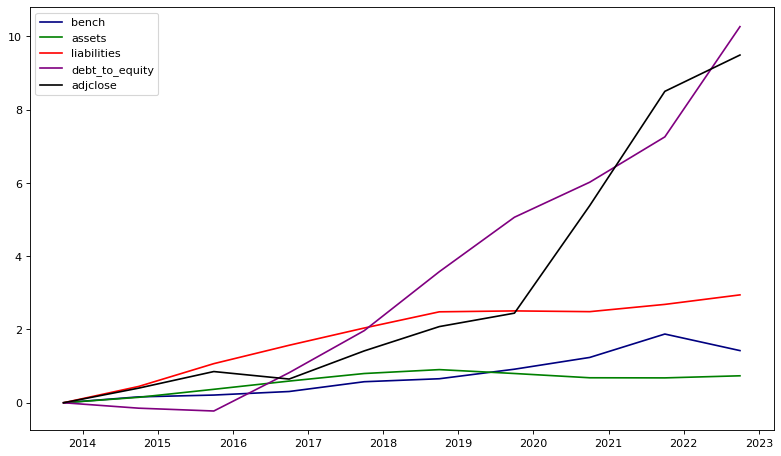

In [161]:
metric = "prog"
plt.figure(figsize=(12, 7), dpi=80)
# plt.plot(graphics["date"],graphics[f"spy_{metric}"],color="blue")
plt.plot(graphics["date"],graphics[f"spy_{metric}_adj"],color="navy")
# plt.plot(graphics["date"],graphics[f"assets_{metric}"],color="maroon")
plt.plot(graphics["date"],graphics[f"assets_{metric}_adj"],color="green")
# plt.plot(graphics["date"],graphics[f"liabilities_{metric}"],color="maroon")
plt.plot(graphics["date"],graphics[f"liabilities_{metric}_adj"],color="red")
# plt.plot(graphics["date"],graphics[f"assets_{metric}"],color="navy")
plt.plot(graphics["date"],graphics[f"debt_to_equity_{metric}"],color="purple")
plt.plot(graphics["date"],graphics[f"adjclose_{metric}"],color="black")
plt.legend(["bench","assets","liabilities","debt_to_equity","adjclose"])
plt.show()